In [17]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.table import Table, join, Column
from astropy.stats import LombScargle
import astropy.units as u

from astropy.io import ascii
import glob, re, copy

import lightkurve
from lightkurve import KeplerLightCurveFile, KeplerLightCurve
from hot_tess_utils import *

#To make sure we have always the same matplotlib settings
#(the ones in comments are the ipython notebook settings)
#%matplotlib inline
import matplotlib as mpl
from matplotlib import rc
import sys, importlib

mpl.style.use('seaborn-colorblind')
mpl.rcParams['figure.figsize']=(12.0,9.0)    #(6.0,4.0)
mpl.rcParams['font.size']=20               #10 
mpl.rcParams['savefig.dpi']= 200             #72 
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
colours = mpl.rcParams['axes.prop_cycle'].by_key()['color']

### Load a hot TESS Object - 'TIC 261867566'

2 lightcurves stitched


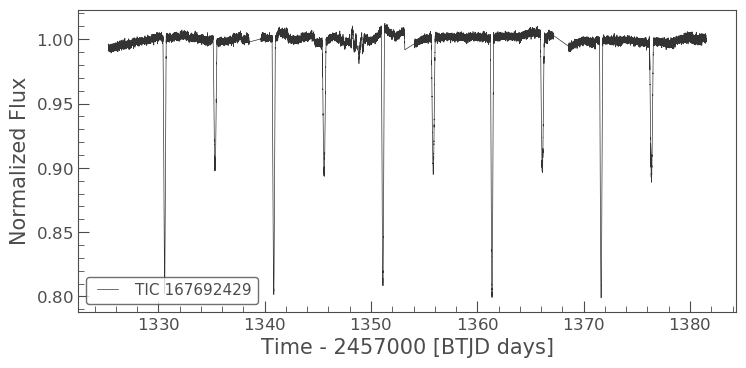

In [18]:
tic = 'TIC 167692429' #<- completes

# Two hot jupiters http://www.sci-news.com/astronomy/tess-two-hot-jupiters-07961.html
#tic = 'TIC 261867566'
#tic = 'TIC 1003831'

# Hot neptunes http://www.sci-news.com/astronomy/tess-hot-neptune-like-exoplanet-sun-like-star-07797.html
#tic = 'TIC 89020549'

lcs = lightkurve.search_lightcurvefile(tic,cadence='long').download_all()
lcs = lcs[:2]

lc = stitch_lc_list(lcs)

In [19]:
### PARAMS ###
renormalise = True
auto = True
star_p_range=(1./24.,30.)
planet_p_range=(1.,360.)

tick = clock()
min_period, max_period = star_p_range

### Renormalise
if renormalise:
    lc2, powers = sine_renormalize(lc,min_period=min_period, max_period=max_period)
else:
    lc2 = lc

### CLEAN
if auto == True:
    lc3, ff, pp, noise, snrs, niter, components = auto_sine_fit(lc2,prob_max = 1e-20, maxiter=200,min_period=min_period,max_period=max_period)
    print('Subtracted %d sine waves' % niter)
else:
    lc3, ff, pp, noise = iterative_sine_fit(lc2, niter,min_period=min_period, max_period=max_period)

### Correct CBVs   
lc4 = correct_all(lc3,ff)

### Clip Outliers
lc5 = purge_outliers(lc4)

### CLEAN Again
if auto == True:
    lc3, ff, pp, noise, snrs, niter, components = auto_sine_fit(lc5,prob_max = 1e-20, maxiter=200,min_period=min_period,max_period=max_period)
    print('Subtracted %d sine waves' % niter)
else:
    lc3, ff, pp, noise = iterative_sine_fit(lc5, niter,min_period=min_period, max_period=max_period)

### Correct CBVs
lc4 = correct_all(lc3,ff)

sine waves:   0%|          | 0/200 [00:00<?, ?it/s]

Lightcurve renormalised


frequencies:  46%|████▌     | 83/180 [00:00<00:00, 822.06it/s]

Auto sine fit!
Subtracted 180 sine waves


sine waves:   0%|          | 0/200 [00:00<?, ?it/s]

CBVs corrected
Clipped 30 outliers


sectors:   0%|          | 0/3 [00:00<?, ?it/s]

Auto sine fit!
Subtracted 175 sine waves


sectors: 100%|██████████| 3/3 [00:00<00:00,  6.47it/s]


CBVs corrected


Doing Transit Search...
Initialized search
Running BLS
Rerunning on finer grid
Fitting transit
xmask:  [1325.29521939 1325.29660827 1325.29799715 ... 1381.51042892 1381.51181781
 1381.5132067 ]
xmask type:  <class 'numpy.ndarray'>
xmask shape:  (36383,)
r:  r_pl


optimizing logp for variables: [logr]
10it [00:00, 10.87it/s, logp=1.853304e+05]
message: Optimization terminated successfully.
logp: 185314.7331853874 -> 185330.40152671322
  0%|          | 0/7 [00:00<?, ?it/s]optimizing logp for variables: [b]

0it [00:00, ?it/s]
0it [00:00, ?it/s, logp=1.853304e+05]
1it [00:00, 33.64it/s, logp=1.853304e+05]
2it [00:00, 43.93it/s, logp=1.853352e+05]
3it [00:00, 50.28it/s, logp=1.853353e+05]
4it [00:00, 53.41it/s, logp=1.853353e+05]
5it [00:00, 56.18it/s, logp=1.853353e+05]
6it [00:00, 58.48it/s, logp=1.853353e+05]
7it [00:00, 67.76it/s, logp=1.853353e+05]
7it [00:00, 67.76it/s, logp=1.853353e+05]
8it [00:00, 67.76it/s, logp=1.853353e+05]
9it [00:00, 67.76it/s, logp=1.853353e+05]
10it [00:00, 67.76it/s, logp=1.853353e+05]
11it [00:00, 67.76it/s, logp=1.853353e+05]
12it [00:00, 67.76it/s, logp=1.853353e+05]
13it [00:00, 67.76it/s, logp=1.853353e+05]
14it [00:00, 67.76it/s, logp=1.853353e+05]
15it [00:00, 69.06it/s, logp=1.853353e+05]
15it [00:00, 69.06

 29%|██▊       | 2/7 [00:09<00:21,  4.38s/it]optimizing logp for variables: [u_star]

0it [00:00, ?it/s]
0it [00:00, ?it/s, logp=1.853700e+05]
1it [00:00, 35.87it/s, logp=1.853700e+05]
2it [00:00, 48.15it/s, logp=1.853701e+05]
3it [00:00, 53.88it/s, logp=1.853701e+05]
4it [00:00, 57.81it/s, logp=1.853701e+05]
5it [00:00, 60.53it/s, logp=1.853701e+05]
6it [00:00, 62.19it/s, logp=1.853701e+05]
7it [00:00, 63.33it/s, logp=1.853701e+05]
8it [00:00, 71.92it/s, logp=1.853701e+05]
8it [00:00, 71.92it/s, logp=1.853701e+05]
9it [00:00, 71.92it/s, logp=1.853701e+05]
10it [00:00, 71.92it/s, logp=1.853701e+05]
11it [00:00, 71.92it/s, logp=1.853701e+05]
12it [00:00, 71.92it/s, logp=1.853701e+05]
13it [00:00, 71.92it/s, logp=1.853701e+05]
14it [00:00, 71.92it/s, logp=1.853701e+05]
15it [00:00, 71.92it/s, logp=1.853701e+05]
16it [00:00, 71.61it/s, logp=1.853701e+05]
16it [00:00, 71.61it/s, logp=1.853701e+05]
17it [00:00, 71.61it/s, logp=1.853701e+05]
18it [00:00, 71.61it/s, logp=1.853701e+05]
19it [0

32it [00:00, 48.16it/s, logp=1.854055e+05]
33it [00:00, 48.16it/s, logp=1.854055e+05]
34it [00:00, 48.16it/s, logp=1.854055e+05]
35it [00:00, 48.16it/s, logp=1.854055e+05]
36it [00:00, 48.56it/s, logp=1.854055e+05]
36it [00:00, 48.56it/s, logp=1.854055e+05]
37it [00:00, 48.56it/s, logp=1.854055e+05]
38it [00:00, 48.56it/s, logp=1.854055e+05]
39it [00:00, 48.56it/s, logp=1.854055e+05]
40it [00:00, 48.56it/s, logp=1.854055e+05]
41it [00:00, 48.27it/s, logp=1.854055e+05]
41it [00:00, 48.27it/s, logp=1.854055e+05]
42it [00:00, 48.27it/s, logp=1.854055e+05]
43it [00:00, 48.27it/s, logp=1.854055e+05]
44it [00:00, 48.27it/s, logp=1.854055e+05]
45it [00:00, 48.27it/s, logp=1.854055e+05]
46it [00:00, 47.17it/s, logp=1.854055e+05]
46it [00:00, 47.17it/s, logp=1.854055e+05]
47it [00:01, 47.17it/s, logp=1.854055e+05]
48it [00:01, 47.17it/s, logp=1.854055e+05]
49it [00:01, 47.17it/s, logp=1.854055e+05]
50it [00:01, 47.17it/s, logp=1.854055e+05]
51it [00:01, 46.55it/s, logp=1.854055e+05]
51it [00:01

Transit search done!
Time elapsed: 202.15 s
Generating results...


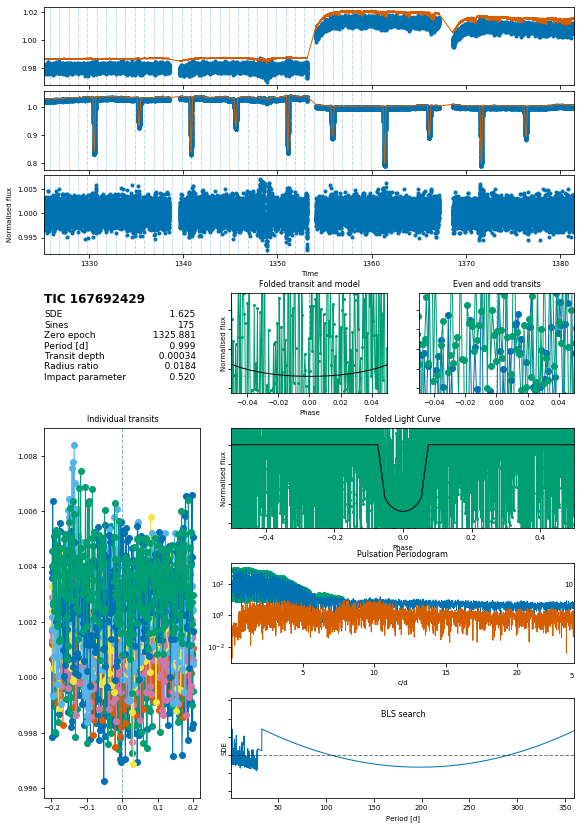

In [20]:
importlib.reload(sys.modules['hot_tess_utils'])
from hot_tess_utils import *

### Transit Search
lc4.pp = pp
lc4.ff = ff
lc4.star_p_range = star_p_range
lc4.niter = niter

print('Doing Transit Search...')
ts = BasicSearch(lc4,period_range=planet_p_range)
ts.run_bls()
fit = ts.fit_transit()
print('Transit search done!')

tock = clock()

print('Time elapsed: %.2f s' % (tock - tick))
print('Generating results...')

plot_all(ts, tic)